In [6]:
import os
os.chdir(r'C:\Users\PC\Desktop\Clinical Bioinformatics\BINF-5505 Applied Genomics\cloned rep\BINF-5507\Assignment2')






In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('Data/heart_disease_uci.csv')

# Drop unnecessary columns if they exist (dataset identifier if present)
df = df.drop(columns=['dataset'], errors='ignore')

# Map binary columns (Male/Female, TRUE/FALSE to 1/0)
binary_mappings = {
    'sex': {'Male': 1, 'Female': 0},
    'fbs': {'TRUE': 1, 'FALSE': 0},
    'exang': {'TRUE': 1, 'FALSE': 0}
}

for col, mapping in binary_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# One-hot encode categorical columns
categorical_columns = ['cp', 'restecg', 'slope', 'thal']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Drop rows where target columns ('chol' for regression, 'num' for classification) are missing
df = df.dropna(subset=['chol', 'num'])

# Separate features and targets
X_reg = df.drop(columns=['chol', 'num'])
y_reg = df['chol']

X_clf = df.drop(columns=['chol', 'num'])
y_clf = df['num']

# Detect fully missing columns (where all values are NaN) - these should be removed
missing_cols = X_reg.columns[X_reg.isnull().all()].tolist()
if missing_cols:
    print(f" Fully missing columns (no data in these): {missing_cols}")
    X_reg = X_reg.drop(columns=missing_cols)
    X_clf = X_clf.drop(columns=missing_cols)

print(f" After dropping fully missing columns, X_reg shape: {X_reg.shape}")

# Save original column names for safe imputation (if all columns survive)
original_columns = X_reg.columns.tolist()

# Impute missing values (fill with mean)
imputer = SimpleImputer(strategy='mean')
X_reg_imputed = imputer.fit_transform(X_reg)
X_clf_imputed = imputer.fit_transform(X_clf)

# Recreate DataFrames after imputation
if X_reg_imputed.shape[1] == len(original_columns):
    X_reg = pd.DataFrame(X_reg_imputed, columns=original_columns)
    X_clf = pd.DataFrame(X_clf_imputed, columns=original_columns)
else:
    print(f" Warning: Column count mismatch after imputation (expected {len(original_columns)}, got {X_reg_imputed.shape[1]}). Column names will be generic.")
    X_reg = pd.DataFrame(X_reg_imputed)
    X_clf = pd.DataFrame(X_clf_imputed)

# Final check
print(f" Final X_reg shape: {X_reg.shape}")
print(f" Final X_clf shape: {X_clf.shape}")

# Train-test split (70% train, 30% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

print(" Train/test split complete.")
print(f"Regression Train Set: {X_train_reg.shape}")
print(f"Classification Train Set: {X_train_clf.shape}")

# Save preprocessed data to Data folder
X_train_reg.to_csv('Data/X_train_reg.csv', index=False)
X_test_reg.to_csv('Data/X_test_reg.csv', index=False)
y_train_reg.to_csv('Data/y_train_reg.csv', index=False)
y_test_reg.to_csv('Data/y_test_reg.csv', index=False)

X_train_clf.to_csv('Data/X_train_clf.csv', index=False)
X_test_clf.to_csv('Data/X_test_clf.csv', index=False)
y_train_clf.to_csv('Data/y_train_clf.csv', index=False)
y_test_clf.to_csv('Data/y_test_clf.csv', index=False)

print(" Preprocessed data saved to Data folder.")




 Fully missing columns (no data in these): ['fbs', 'exang']
 After dropping fully missing columns, X_reg shape: (890, 15)
 Final X_reg shape: (890, 15)
 Final X_clf shape: (890, 15)
 Train/test split complete.
Regression Train Set: (623, 15)
Classification Train Set: (623, 15)
 Preprocessed data saved to Data folder.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading new data from preprocessing
X_train_reg = pd.read_csv('Data/X_train_reg.csv')
X_test_reg = pd.read_csv('Data/X_test_reg.csv')
y_train_reg = pd.read_csv('Data/y_train_reg.csv').squeeze() 
y_test_reg = pd.read_csv('Data/y_test_reg.csv').squeeze()

X_train_clf = pd.read_csv('Data/X_train_clf.csv')
X_test_clf = pd.read_csv('Data/X_test_clf.csv')
y_train_clf = pd.read_csv('Data/y_train_clf.csv').squeeze()
y_test_clf = pd.read_csv('Data/y_test_clf.csv').squeeze()


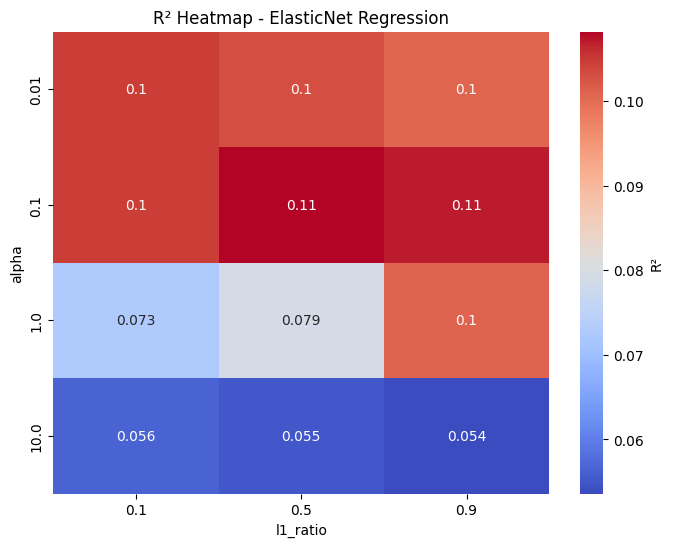

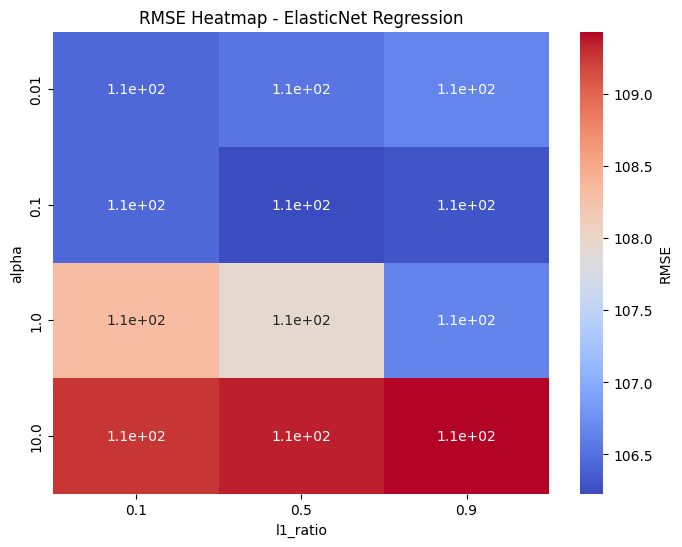

Best ElasticNet Model:
  Alpha: 0.1
  L1 Ratio: 0.5
  R²: 0.1082
  RMSE: 106.2285


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Load Preprocessed Data
X_train_reg = pd.read_csv('Data/X_train_reg.csv')
X_test_reg = pd.read_csv('Data/X_test_reg.csv')
y_train_reg = pd.read_csv('Data/y_train_reg.csv').squeeze()
y_test_reg = pd.read_csv('Data/y_test_reg.csv').squeeze()

# Define Hyperparameters to Test
alphas = [0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.9]

# Train Models and Evaluate 
results = []

# Predict/evaluate/ store results
for alpha in alphas:
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train_reg, y_train_reg)

        y_pred = model.predict(X_test_reg)

        r2 = r2_score(y_test_reg, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))

        results.append([alpha, l1_ratio, r2, rmse])

#  Convert Results to DataFrame
results_df = pd.DataFrame(results, columns=['alpha', 'l1_ratio', 'r2', 'rmse'])

#  Heatmap for R²
r2_pivot = results_df.pivot_table(index='alpha', columns='l1_ratio', values='r2')

plt.figure(figsize=(8,6))
sns.heatmap(r2_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'R²'})
plt.title('R² Heatmap - ElasticNet Regression')
plt.show()

#  Heatmap for RMSE
rmse_pivot = results_df.pivot_table(index='alpha', columns='l1_ratio', values='rmse')

plt.figure(figsize=(8,6))
sns.heatmap(rmse_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'RMSE'})
plt.title('RMSE Heatmap - ElasticNet Regression')
plt.show()

#  Identify and Highest R²
best_model = results_df.sort_values('r2', ascending=False).iloc[0]
print(f"Best ElasticNet Model:")
print(f"  Alpha: {best_model['alpha']}")
print(f"  L1 Ratio: {best_model['l1_ratio']}")
print(f"  R²: {best_model['r2']:.4f}")
print(f"  RMSE: {best_model['rmse']:.4f}")



c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 Best Logistic Regression Model: Solver=saga, Penalty=l1, Accuracy=0.8202, F1=0.8509
 Best k-NN Model: n_neighbors=10.0, Accuracy=0.6517, F1=0.6951


c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


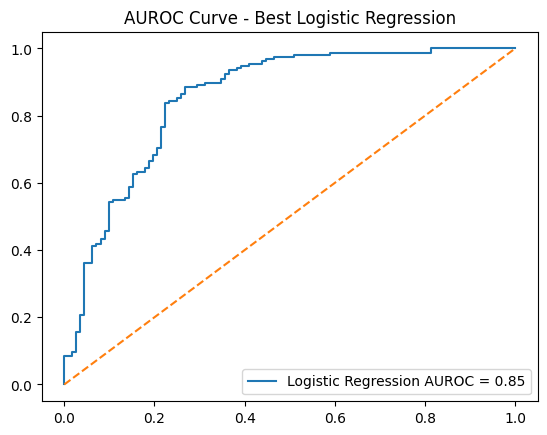

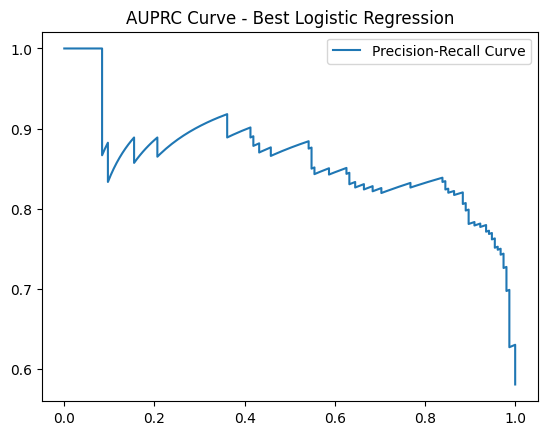

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, precision_recall_curve

# Load Preprocessed Classification Data
X_train_clf = pd.read_csv('Data/X_train_clf.csv')
X_test_clf = pd.read_csv('Data/X_test_clf.csv')
y_train_clf = pd.read_csv('Data/y_train_clf.csv').squeeze()
y_test_clf = pd.read_csv('Data/y_test_clf.csv').squeeze()

#  Convert y to binary (0 = no heart disease, 1 = any heart disease)
y_train_clf = (y_train_clf > 0).astype(int)
y_test_clf = (y_test_clf > 0).astype(int)

#  Logistic Regression Tuning
logistic_results = []

solvers = ['liblinear', 'saga']
penalties = ['l1', 'l2']

for solver in solvers:
    for penalty in penalties:
        if solver == 'liblinear' and penalty == 'l2':  
            continue
        try:
            model = LogisticRegression(solver=solver, penalty=penalty, max_iter=1000)
            model.fit(X_train_clf, y_train_clf)

            y_pred = model.predict(X_test_clf)
            acc = accuracy_score(y_test_clf, y_pred)
            f1 = f1_score(y_test_clf, y_pred)

            logistic_results.append([solver, penalty, acc, f1])

        except Exception as e:
            print(f"Logistic Regression failed for solver={solver}, penalty={penalty}: {e}")

# Convert to DataFrame
logistic_df = pd.DataFrame(logistic_results, columns=['solver', 'penalty', 'accuracy', 'f1'])

#  Find Best Logistic Regression Model
if logistic_df.empty:
    raise ValueError(" No valid Logistic Regression models were trained. Please check your data and solver/penalty combinations.")
else:
    best_logistic = logistic_df.sort_values(by='f1', ascending=False).iloc[0]
    print(f" Best Logistic Regression Model: Solver={best_logistic['solver']}, Penalty={best_logistic['penalty']}, Accuracy={best_logistic['accuracy']:.4f}, F1={best_logistic['f1']:.4f}")

# k-NN Tuning
knn_results = []
for k in [1, 5, 10]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_clf, y_train_clf)

    y_pred = model.predict(X_test_clf)
    acc = accuracy_score(y_test_clf, y_pred)
    f1 = f1_score(y_test_clf, y_pred)

    knn_results.append([k, acc, f1])

knn_df = pd.DataFrame(knn_results, columns=['n_neighbors', 'accuracy', 'f1'])

# Best k-NN Model
best_knn = knn_df.sort_values(by='f1', ascending=False).iloc[0]
print(f" Best k-NN Model: n_neighbors={best_knn['n_neighbors']}, Accuracy={best_knn['accuracy']:.4f}, F1={best_knn['f1']:.4f}")

# Plot AUROC and AUPRC for Best Logistic Model
best_model = LogisticRegression(solver=best_logistic['solver'], penalty=best_logistic['penalty'], max_iter=1000)
best_model.fit(X_train_clf, y_train_clf)
y_proba = best_model.predict_proba(X_test_clf)[:, 1]

# AUROC
fpr, tpr, _ = roc_curve(y_test_clf, y_proba)
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression AUROC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.title('AUROC Curve - Best Logistic Regression')
plt.show()

# AUPRC
precision, recall, _ = precision_recall_curve(y_test_clf, y_proba)

plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.legend()
plt.title('AUPRC Curve - Best Logistic Regression')
plt.show()
